In [1]:
import pandas as pd
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mlflow.__version__

'3.5.1'

In [3]:
# Load all mlflow experiments and run data
experiments = mlflow.search_experiments()

In [19]:
# Extract runs from a specific experiment
experiment_id = experiments[0].experiment_id
runs = mlflow.search_runs(experiment_ids=[experiment_id])
# RUN_ID = runs[runs["tags.mlflow.runName"]=="painted-turtle-210"].run_id.iloc[0]
RUN_ID = "3938856feace45d1ac2bc18c0208bb5b"
EXPERIMENT_ID = runs[runs["tags.mlflow.runName"]=="painted-turtle-210"].experiment_id.iloc[0]
client = mlflow.MlflowClient()
run = client.get_run(RUN_ID)


In [20]:
metrics_history = {}
for metric in run.data.metrics.keys():
    metric_history = client.get_metric_history(run_id=RUN_ID, key=metric)
    metrics_history[metric] = [metric_history.value for metric_history in metric_history]

In [21]:
metrics_history_df = pd.DataFrame(metrics_history)
metrics_history_df['epoch'] = metrics_history_df.index + 1

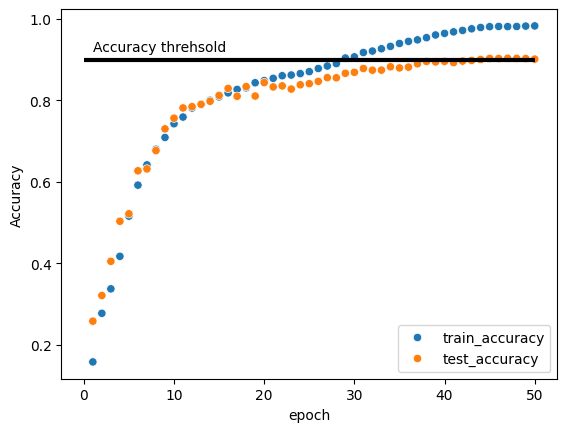

In [22]:
short_metrics_history_df = metrics_history_df.melt(id_vars=['epoch'], var_name='metric', value_name='value')
g = sns.scatterplot(data=short_metrics_history_df[short_metrics_history_df.metric.str.contains('accuracy')], x='epoch', y='value', hue='metric')
plt.hlines(xmin=0, xmax=short_metrics_history_df.epoch.max(), y=0.9, color='black', linewidth=3)
g.set_ylabel('Accuracy')
g.text(1, 0.92, 'Accuracy threhsold', color='black')
g.legend(loc='lower right')

# Loading model

In [27]:
# TODO: check whether model loading works better when loading the actual model

In [29]:
artifacts = mlflow.artifacts.list_artifacts(run_id=RUN_ID)

In [34]:
model_uri = f"runs:/{RUN_ID}/model-epoch-5"
model = mlflow.pytorch.load_model(model_uri)

In [35]:
model

VGGBase(
  (layer_blocks): ModuleList(
    (0): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): ModuleList(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): ModuleList(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-3): 3 x Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (3): ModuleList(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-3): 3 x Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (4): ModuleList(
      (0-3): 4 x Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (activation_blocks): ModuleList(
    (0-1): 2 x ModuleList(
      (0-1): 2 x ReLU(inplace=True)
 